## SupervisedLearningHW-13

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need. 


### Preprocessing in bottle_file

In [42]:
bot_df=pd.read_csv('bottle.csv',low_memory=False)
bot_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
 # I take the first 10000 data points to examine more in detail
bottle_df = bot_df[:][:10000]

In [4]:
bottle_df.isnull().sum()

Cst_Cnt                    0
Btl_Cnt                    0
Sta_ID                     0
Depth_ID                   0
Depthm                     0
                       ...  
TA1                    10000
TA2                    10000
pH2                    10000
pH1                    10000
DIC Quality Comment    10000
Length: 74, dtype: int64

### Cleaning null values

In [5]:
#dropping the columns which have more than 50% of Nans.
bottle_clean_df= bottle_df.drop(['TA1','TA2','pH2','pH1','R_O2Sat','O2ml_L','R_O2','O2Sat','Oxy_µmol/Kg','DIC Quality Comment','R_PHAEO','R_SAMP','DIC1','DIC2','R_NO3','R_NO2','R_NH4','R_CHLA','BtlNum','T_qual','S_qual','O_qual','SThtaq','O2Satq','ChlorA','Phaeop','PO4uM','SiO3uM','NO2uM','NO3uM','NH3uM','C14As1','C14A1p','C14As2','C14A2p','MeanAs','MeanAp','IncTim','LightP','DarkAs','DarkAp','R_SIO3','R_PO4'],axis=1)


In [6]:
bottle_clean_df.isnull().sum()

Cst_Cnt          0
Btl_Cnt          0
Sta_ID           0
Depth_ID         0
Depthm           0
T_degC          44
Salnty         242
STheta         269
RecInd           0
T_prec          44
S_prec         242
P_qual           0
Chlqua           0
Phaqua           0
PO4q          3350
SiO3qu           0
NO2q             0
NO3q             0
NH3q             0
C14A1q           0
C14A2q           0
DarkAq           0
MeanAq           0
R_Depth          0
R_TEMP          44
R_POTEMP       351
R_SALINITY     242
R_SIGMA        442
R_SVA          442
R_DYNHT        369
R_PRES           0
dtype: int64

### Handling Missing Values

In [7]:
# interpolating the columns to fill Nans.
bottle_clean_df=bottle_clean_df.interpolate()

In [8]:
bottle_clean_df.isnull().sum()

Cst_Cnt       0
Btl_Cnt       0
Sta_ID        0
Depth_ID      0
Depthm        0
T_degC        0
Salnty        0
STheta        0
RecInd        0
T_prec        0
S_prec        0
P_qual        0
Chlqua        0
Phaqua        0
PO4q          0
SiO3qu        0
NO2q          0
NO3q          0
NH3q          0
C14A1q        0
C14A2q        0
DarkAq        0
MeanAq        0
R_Depth       0
R_TEMP        0
R_POTEMP      0
R_SALINITY    0
R_SIGMA       0
R_SVA         0
R_DYNHT       0
R_PRES        0
dtype: int64

In [9]:
#finally replaced all Nans in bottle clean df
bottle_clean_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,...,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,25.649,3,1.0,...,9.0,9.0,0.0,10.50,10.50,33.440,25.64,233.0,0.00,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,25.656,3,2.0,...,9.0,9.0,8.0,10.46,10.46,33.440,25.65,232.5,0.01,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,25.654,7,2.0,...,9.0,9.0,10.0,10.46,10.46,33.437,25.65,232.8,0.02,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,25.643,3,2.0,...,9.0,9.0,19.0,10.45,10.45,33.420,25.64,234.1,0.04,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,25.643,7,2.0,...,9.0,9.0,20.0,10.45,10.45,33.421,25.64,234.0,0.04,20


### Standardization

We are converting our datas to look like normally distributed(zero mean and unit variance).


In [10]:
calcofi_df=bottle_clean_df.select_dtypes(include=[np.number])
calcofi_df

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,P_qual,...,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,1,1,0,10.50,33.440,25.649,3,1.0,2.0,9.0,...,9.0,9.0,0.0,10.50,10.50,33.440,25.64,233.0,0.00,0
1,1,2,8,10.46,33.440,25.656,3,2.0,2.0,9.0,...,9.0,9.0,8.0,10.46,10.46,33.440,25.65,232.5,0.01,8
2,1,3,10,10.46,33.437,25.654,7,2.0,3.0,9.0,...,9.0,9.0,10.0,10.46,10.46,33.437,25.65,232.8,0.02,10
3,1,4,19,10.45,33.420,25.643,3,2.0,2.0,9.0,...,9.0,9.0,19.0,10.45,10.45,33.420,25.64,234.1,0.04,19
4,1,5,20,10.45,33.421,25.643,7,2.0,3.0,9.0,...,9.0,9.0,20.0,10.45,10.45,33.421,25.64,234.0,0.04,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,331,9996,43,15.71,33.640,24.769,3,2.0,2.0,9.0,...,9.0,9.0,43.0,15.71,15.70,33.640,24.76,318.1,0.14,43
9996,331,9997,50,15.35,33.621,24.835,7,2.0,3.0,9.0,...,9.0,9.0,50.0,15.35,15.34,33.621,24.83,312.0,0.16,50
9997,331,9998,65,14.64,33.510,24.904,3,2.0,2.0,9.0,...,9.0,9.0,65.0,14.64,14.63,33.510,24.90,305.9,0.21,65
9998,331,9999,75,14.04,33.459,24.991,7,2.0,3.0,9.0,...,9.0,9.0,75.0,14.04,14.03,33.459,24.99,297.8,0.24,75


In [11]:
from sklearn.preprocessing import StandardScaler
stand=StandardScaler()
calcofi_stand=stand.fit_transform(calcofi_df)

### Preprocessing in cast_file

In [12]:
cast_df=pd.read_csv('cast.csv',low_memory=False)
cast_df.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [19]:
cast_df.isnull().sum()

Cst_Cnt           0
Cruise_ID         0
Cruise            0
Cruz_Sta          0
DbSta_ID          0
              ...  
Wet_T         15415
Wea            7597
Cloud_Typ     24484
Cloud_Amt     22522
Visibility    24897
Length: 61, dtype: int64

### Cleaning null values

In [20]:
cast_clean_df=cast_df.drop(['Wet_T','Cloud_Typ','Cloud_Amt','Visibility','Distance','Secchi','ForelU','Order_Occ','Cruz_Leg','Data_Or','IntChl','IntC14','Inc_Str','Inc_End','PST_LAN','Civil_T','TimeZone','Wave_Dir','Wave_Ht','Wave_Prd','Barometer','Dry_T'],axis=1)

In [21]:
cast_clean_df= cast_clean_df.select_dtypes(include=[np.number])

In [26]:
cast_clean_df=cast_clean_df.interpolate()
cast_clean_df['Bottom_D']=cast_clean_df['Bottom_D'].fillna(cast_clean_df['Bottom_D'].mean())

In [27]:
cast_clean_df.isnull().sum()

Cst_Cnt        0
Cruise         0
Cruz_Sta       0
DbSta_ID       0
Quarter        0
Year           0
Month          0
Julian_Date    0
Julian_Day     0
Lat_Dec        0
Lat_Deg        0
Lat_Min        0
Lon_Dec        0
Lon_Deg        0
Lon_Min        0
Rpt_Line       0
St_Line        0
Ac_Line        0
Rpt_Sta        0
St_Station     0
Ac_Sta         0
Bottom_D       0
Event_Num      0
Wind_Dir       0
Wind_Spd       0
Wea            0
dtype: int64

### Standardization
We are converting our datas to look like normally distributed(zero mean and unit variance).

In [28]:
cast=StandardScaler()
cast_stand=cast.fit_transform(cast_clean_df)

## 2.Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature. 


In [29]:
correlation_df=bot_df[['Depthm','T_degC','Salnty','STheta','RecInd','T_prec','S_prec']]

In [30]:
#creating correlation matrix
cor_matrix= correlation_df.corr()
cor_matrix

,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec
Depthm,1.000000,-0.681201,0.572630,0.582710,0.082316,0.019422,0.005934
T_degC,-0.681201,1.000000,-0.505266,-0.829155,-0.066507,-0.041076,-0.036218
Salnty,0.572630,-0.505266,1.000000,0.603470,0.067320,-0.019075,-0.079280
STheta,0.582710,-0.829155,0.603470,1.000000,0.060133,0.026236,0.006887
RecInd,0.082316,-0.066507,0.067320,0.060133,1.000000,0.041580,0.360947
T_prec,0.019422,-0.041076,-0.019075,0.026236,0.041580,1.000000,0.098015
S_prec,0.005934,-0.036218,-0.079280,0.006887,0.360947,0.098015,1.000000


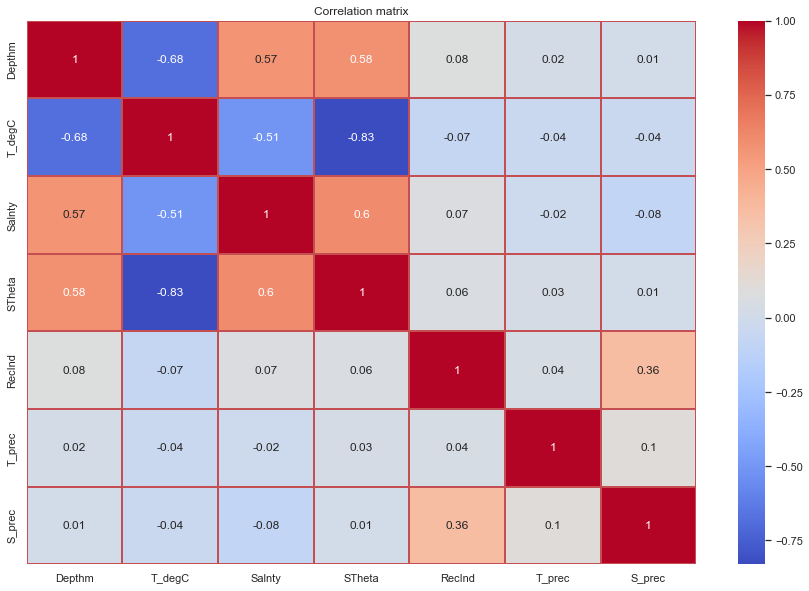

In [35]:
fig,ax=plt.subplots()
sns.set(rc={"figure.figsize":(15, 10)})
sns.heatmap(cor_matrix.round(2),annot= True,cmap="coolwarm",linewidth=1.5,linecolor='r')
ax.set_title('Correlation matrix');
plt.show()

### Describe your findings

The correlation goes from + 1 to - 1 where 1 is total positive linear correlation 0 is no linear correlation and negative 1 is total negative linear correlation.

From color bar,

 * Blues are negative correlations, 

 * Darker the blue, stronger negative correlation 

 * middle section where the colors are real light white or almost gray where there's not much correlation at all 

 * the Reds are positive correlation and 

 * the darker the red the stronger positive correlation
 
 * There is a negative correlation between the salinity(Salnty) and the temperature of the sea(T_degC). 
 
* Water temperature(T_degC) is highly correlated(negative correlation) with STheta, Depthm parameters.
 
* Water temperature is  strongly correlated with itself. 
  
* There is weak correlation between T_deg and S_pred,RecInd,T_prec.

## 3.Perform linear regression on the dataset to see if you can predict water temperature based on salinity.  

### Regression Analysis of oceanographic data to find the relationship between the temperature and the salinity of water.

In [40]:
#Creating data set for generating the model

X=np.array(bottle_clean_df['Salnty']).reshape(-1,1)
y=np.array(bottle_clean_df['T_degC']).reshape(-1,1)

#splitting datas
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=88)

# fitting the linear regression model
from sklearn.linear_model import LinearRegression

# creating an instantiation for LinearRegression
LR=LinearRegression()

# fitting the model
LR.fit(X_train,y_train)

#accuracy score
print("Accuracy Score: ",LR.score(X_test,y_test))

#y_pred
y_pred= LR.predict(X_test)

Accuracy Score:  0.41908478015328154


In [149]:
# Since we got our score as 0.42, it is not like the great value and either it is not low. So there is a chance to 
# predict water temperature based on salinity.

## 4.Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics . 


## Evaluating Our Model

* There are few metrices used to evaluate the regression model 

        * Mean Squared Error(MSE)
        * Root Mean Squared Error(RMSE)
        * R squared(R^2)
        
        
### R^2

R^2 explains how well regression line predicts the actual values. There is no confusion about r and r squared.

|                r                                       |                           r squared                          |
|:------------------------------------------------------:|:-------------------------------------------------------------|
|1. correlation (r) has values between -1 to 1           |r squared has values between 0 to 1                           |
|                                                        |                                                              |
|2. It explains the relationship between two quantitative|It explains how well regression line predicts the actual      |
|variables based on direction & strength.                |values.                                                       |
|                                                        |Also it explains how close our predicted values with actual   |
|                                                        |values.                                                       |

For example: 

* If r^2 =0.9(closes to 1) <font color='blue'> tells that predicted and actual values are close enough </font> 


* If r^2 =0.07 (low value) <font color='blue'> tells that there is more distance in predicted and actual values and the regression line doesn't fit the data </font>

### MSE(Mean Squared Error)

* MSE is one of model evaluation measure for regression models. There is no correct value for MSE. <font color='blue'>The lower the value indicates a perfect fit.</font>

In [32]:
#r2=1 is a perfect prediction

from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)

print("MSE Score for Test set: ", mse.round(2))
print("R2 Score for Test set: ", r2.round(2))

MSE Score for Test set:  9.26
R2 Score for Test set:  0.42


## 5.Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values. 


In [ ]:
#regression line predicts the change(either increase or decrease) in y when x increases.
#regression line represents the pattern of the data.

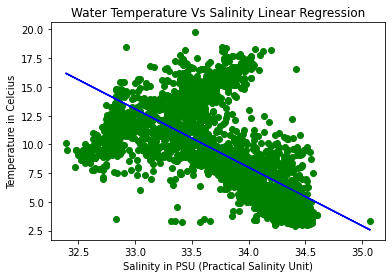

In [41]:
plt.scatter(X_test, y_test, color = 'g')
plt.plot(X_test, y_pred, color='b')
plt.xlabel('Salinity in PSU (Practical Salinity Unit)')
plt.ylabel('Temperature in Celcius')
plt.title("Water Temperature Vs Salinity Linear Regression")
plt.show()

## 6.Do some research on polynomial regression. Describe what it is any how it works in markdown. 

### Why Polynomial Regression?

* Linear Regression works well when the data has linear relationship. If we have non linear data, then linear regression will not be able to fit a line for the datas. 

* Polynomial Regression is a form of linear regression. <font color ='blue'> When there is a non linear relationship between X and y variables, then we add some polynomial terms to linear regression to convert it into polynomial regression.</font>

* Polynomial Regression helps identify the curvilinear relationship between X and y. We have to apply polynomial terms to the inputs before we send it to the model.

## 7.Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here. 


In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X=np.array(bottle_clean_df['Salnty']).reshape(-1,1)
y=np.array(bottle_clean_df['T_degC']).reshape(-1,1)

#splitting datas
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=88)

#creating an object for polynomial features
poly=PolynomialFeatures(degree=2)

#applying polynomial regression to input data
X_train_poly = poly.fit_transform(X_train)

#creating an object for Linear Regression
Reg=LinearRegression()

#fitting the model
Reg.fit(X_train_poly,y_train)

#accuracy score to the model
print("Accuracy Score: ",Reg.score(poly.transform(X_test),y_test))

#y_pred
y_pred=Reg.predict(poly.transform(X_test))

Accuracy Score:  0.5880173287171604


### Mean squared error and R2 

In [35]:
mse_poly=mean_squared_error(y_test,y_pred)
r2_poly=r2_score(y_test,y_pred)
print("MSE Score for Test set: ", mse_poly.round(2))
print("R2 Score for Test set: ", r2_poly.round(2))

MSE Score for Test set:  6.57
R2 Score for Test set:  0.59


## 8.Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved. 

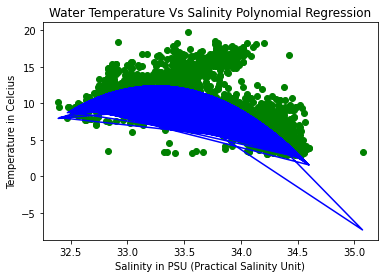

In [36]:
plt.scatter(X_test,y_test,color='g')
plt.plot(X_test,y_pred,color='b')
plt.xlabel('Salinity in PSU (Practical Salinity Unit)')
plt.ylabel('Temperature in Celcius')
plt.title("Water Temperature Vs Salinity Polynomial Regression")
plt.show()

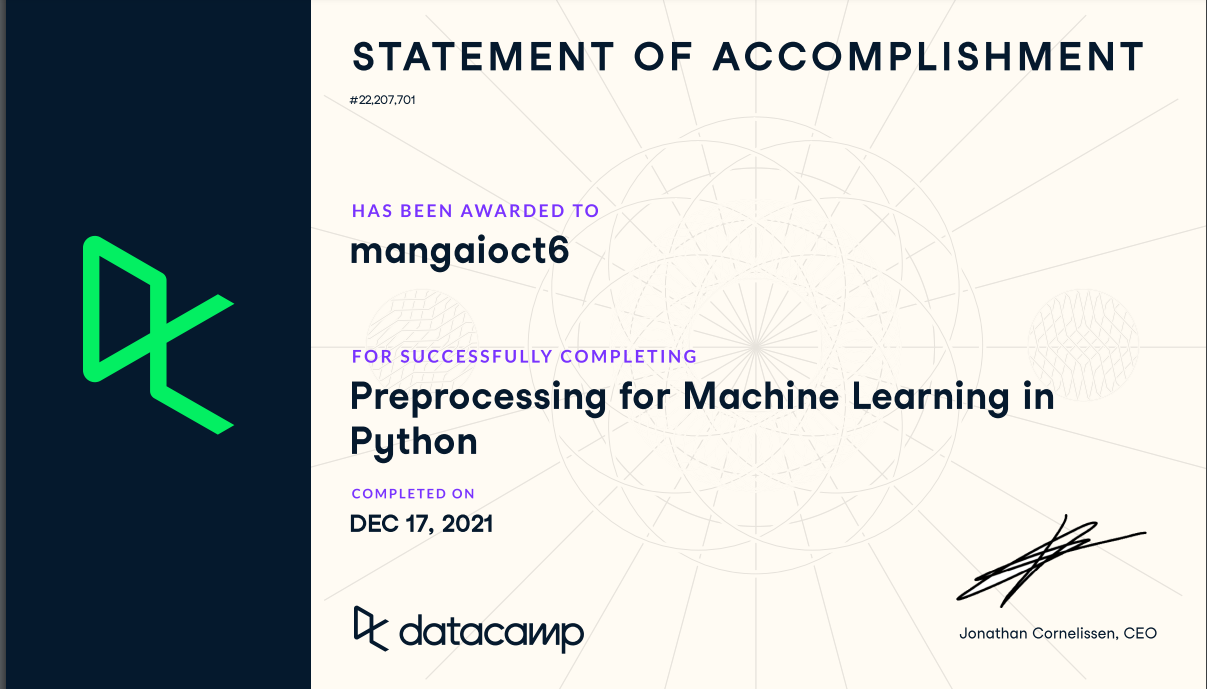

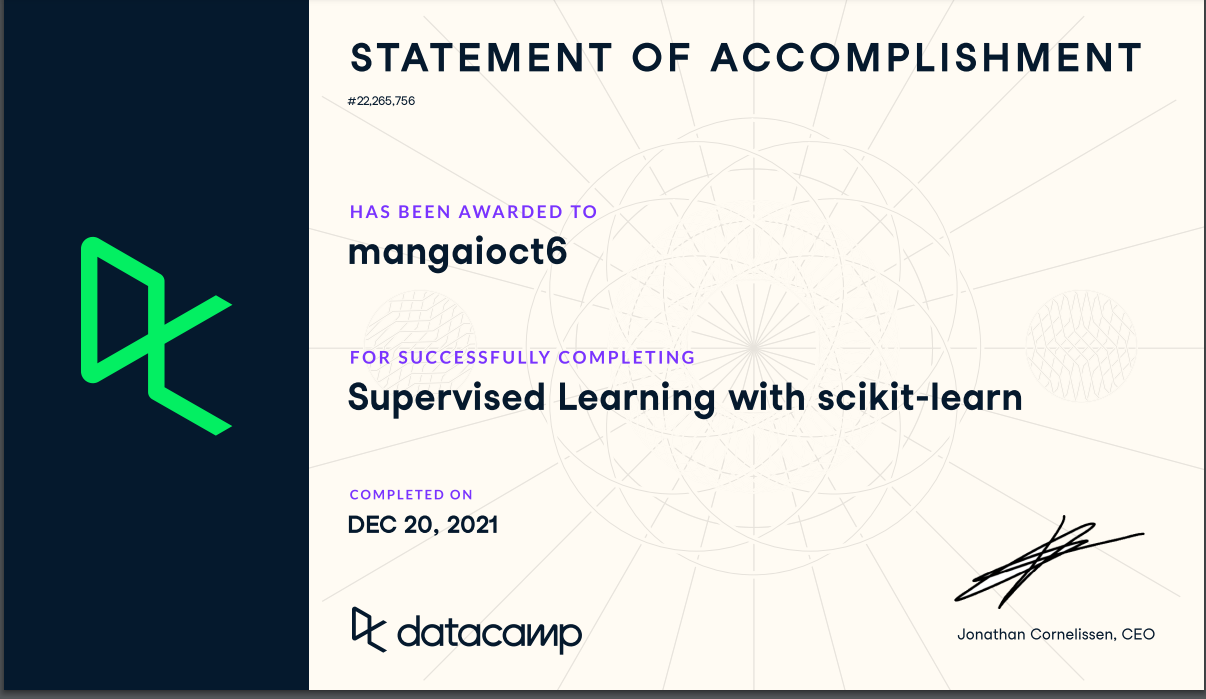